In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [3]:
model = BayesianNetwork([('A', 'C'), ('C', 'D'), ('B', 'D')])

In [6]:
cpd_b = TabularCPD(variable='B', variable_card=2, values=[[1/2], [1/2]])
cpd_a = TabularCPD(variable='A', variable_card=2, values=[[9/10], [1/10]])
cpd_c = TabularCPD(variable='C', variable_card=2,
                       # C = 0, A = 0;   C = 0, A = 1
                       # C = 1, A = 0;   C = 1, A = 1
                       values=[[0.7, 8/10],
                               [0.3, 2/10]],
                       evidence=['A'],
                       # evidence_card = nr de valori pe care le poate lua variabila de care depinde
                       evidence_card=[2])
cpd_d = TabularCPD(variable='D', variable_card=2,
                        # prima linie: D = 0, B = 0, C = 0;  D = 0, B = 0, C = 1;
                        #              D = 0, B = 1, C = 0;  D = 0, B = 1, C = 1
                       values=[[3/10, 1/2, 4/10, 8/10],
                               [7/10, 1/2, 6/10, 2/10]],
                       evidence=['B', 'C'],
                       evidence_card=[2, 2])

model.add_cpds(cpd_a, cpd_b, cpd_c, cpd_d)
model.check_model()

True

In [8]:
infer = VariableElimination(model)
posterior_p = infer.query(["D"])
print(f"{posterior_p} \n")

+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.4370 |
+------+----------+
| D(1) |   0.5630 |
+------+----------+ 



deci p(D = 0) = 43.7/100

In [14]:
from scipy import stats
import numpy as np

In [16]:
p = 1/5
geom_rv = stats.geom(p)
samples = geom_rv.rvs(size=100)
sum_samples = np.sum(samples)
num_samples = len(samples)

In [19]:
alpha_prior, beta_prior = 2, 2

alpha_post = alpha_prior + num_samples
beta_post = beta_prior + sum_samples - num_samples

posterior_dist = stats.beta(alpha_post, beta_post)

print(f"alpha_posterior: {alpha_post}\nbeta_posterior: {beta_post}")

alpha_posterior: 102
beta_posterior: 469


alpha_post = prior ​+n=2+100=102

beta_post​=2+500−100=402

In [22]:
import matplotlib.pyplot as plt

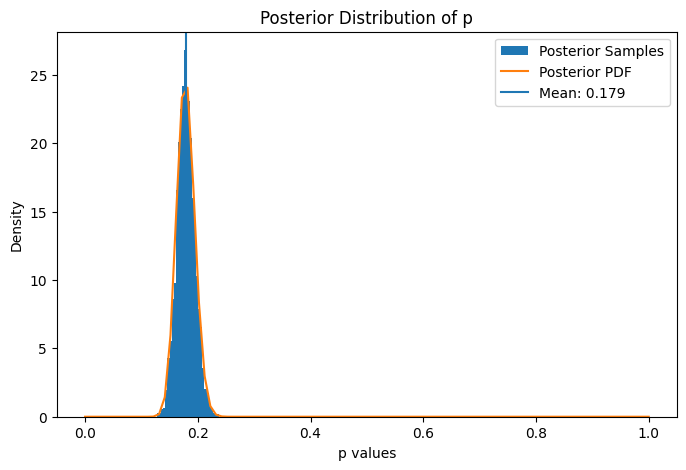

In [33]:
posterior_samples = posterior_dist.rvs(size=5000)

plt.figure(figsize=(8, 5))
plt.hist(posterior_samples, bins=30, density=True, label="Posterior Samples")
x = np.linspace(0, 1, 100)
plt.plot(x, posterior_dist.pdf(x), label="Posterior PDF")
plt.axvline(posterior_mean, color='k', label=f"Mean: {posterior_mean:.3f}")
plt.xlabel("p values")
plt.ylabel("Density")
plt.legend()
plt.title("Posterior Distribution of p")
plt.show()

In [29]:
posterior_mean = posterior_dist.mean()
print(f"posterior_mean: {posterior_mean}")

posterior_mean: 0.1786339754816112
